# Exploratory data analysis

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [0]:
iris = datasets.load_iris()

In [3]:
print(type(iris),'\n',dir(iris))

<class 'sklearn.utils.Bunch'> 
 ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [4]:
print('Feature names', iris.feature_names)
print('Target names', iris.target_names)

Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names ['setosa' 'versicolor' 'virginica']


In [5]:
print('Dimension, Shape, Size')
print(iris.data.ndim, ',', iris.data.shape, ',', iris.data.size)

Dimension, Shape, Size
2 , (150, 4) , 600


In [6]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y = pd.DataFrame(iris.target, columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


**Q. How many data points for each species is present?**

In [8]:
name_lookup = { key: val for key, val in zip(range(3), iris.target_names)}
name_lookup

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [9]:
inv_lookup = { value: key for key,value in name_lookup.items()}
inv_lookup

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [10]:
y['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [0]:
df_iris = pd.concat([X, y], axis=1)

## Bivariate analysis

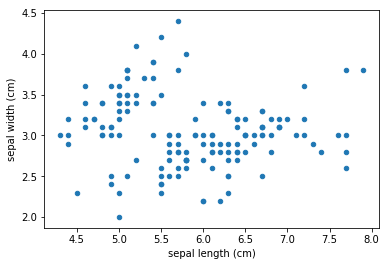

In [12]:
# Using matplotlib
df_iris.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')

In [13]:
df_iris['target']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


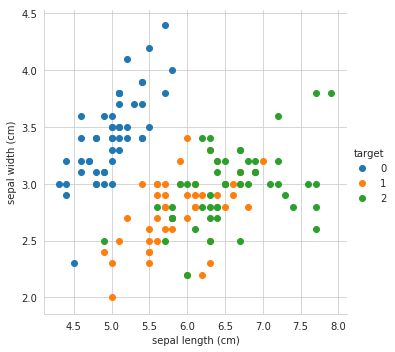

In [14]:
# Seaborn
sns.set_style(style='whitegrid')
sns.FacetGrid(df_iris, hue='target', size=5) \
    .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
    .add_legend()
plt.show()

## Multivariate analysis 

### Pair plots (till 6D)

In [0]:
df_iris['target'] = list(map(lambda x: name_lookup[x], df_iris['target'].values))

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


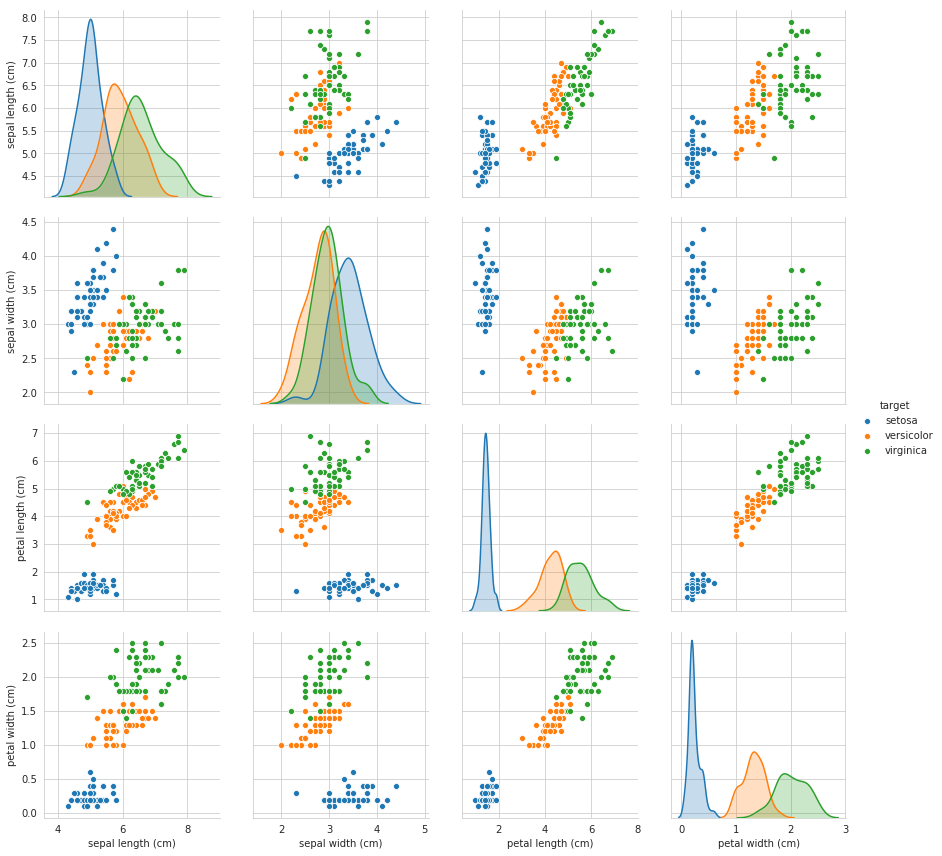

In [17]:
# pair plot

plt.close();
sns.set_style(style='whitegrid');
sns.pairplot(df_iris, hue='target' ,height=3); # 'height' parameter is the new variable for 'size'
plt.show();

# The diagonals in the graphs are PDFs

**Observations**
1. Setosa can be easily seperable
2. Petal length and petal width are the two prominent factors which can help in identifying classes.

 **Limitations of pair plot**

- When the number of features increases it becomes difficult to plot.
- As a thumb rule, maximum of 6 features can be used for pairplots. 6_C_2 = 15 graphs.
- For higher dimensional data, methods like `PCA` and `t-SNE` can be used.

### Histogram, PDF, CDF 

Histograms are used for univariate analysis.

> Univariate analysis helps us answering which of the features plays the most important role in classification.

In [18]:
df_iris.target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
setosa = df_iris[ df_iris['target'] == 'setosa']
versicolor = df_iris.loc[ df_iris['target'] == 'versicolor']
virginica = df_iris.loc[ df_iris['target'] == 'virginica' ] 

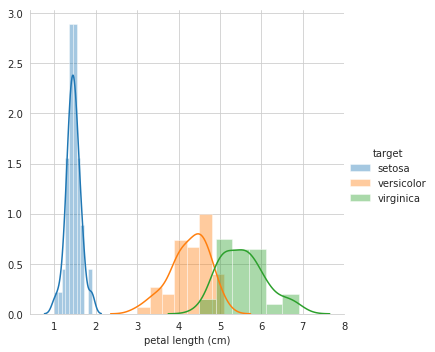

In [20]:
#histogram on petal length
sns.FacetGrid(df_iris, hue='target', height=5) \
    .map(sns.distplot, 'petal length (cm)') \
    .add_legend()
    
plt.show()

PDF or probability distribution function can also be considered as the smoothened histogram.

It depicts the chances of a certain value(here petal_length) to be a certain class.

Here, we can separate classes into three region. One of them being, 2 to 4.8(intersection of two PDFs) for versicolor.

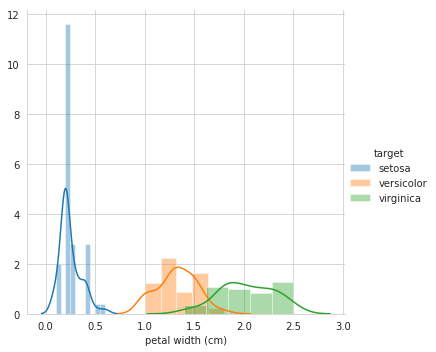

In [21]:
# histogram on petal width

sns.FacetGrid(df_iris, hue='target', height=5)\
    .map(sns.distplot, 'petal width (cm)')\
    .add_legend()

plt.show()

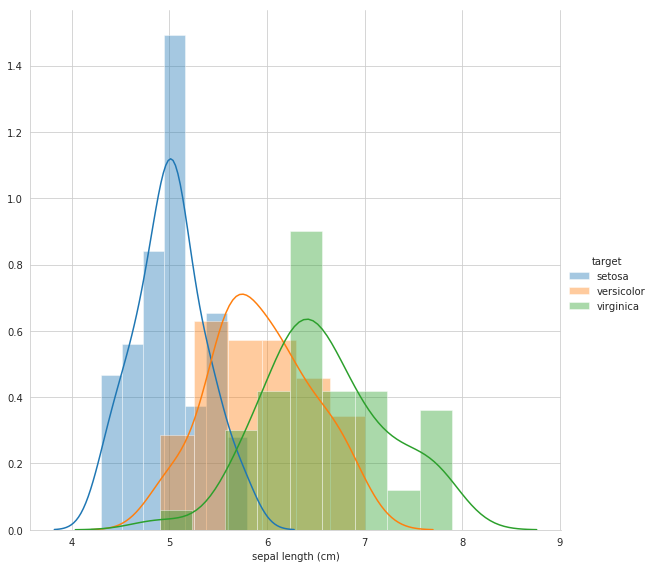

In [22]:
# Sepal length
sns.FacetGrid(df_iris, hue='target', height=8)\
    .map(sns.distplot, 'sepal length (cm)')\
    .add_legend()

plt.show()

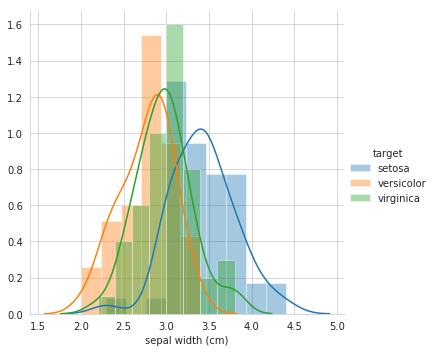

In [23]:
# sepal width
sns.FacetGrid(df_iris, hue='target', height=5)\
    .map(sns.distplot, 'sepal width (cm)')\
    .add_legend()

plt.show()

**Thumb rule:** The farther the pdf of features the better. Here the feature importance is `petal length > petal width >> sepal length >> sepal width`. 

## CDF (Cumulative distributive function)

[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


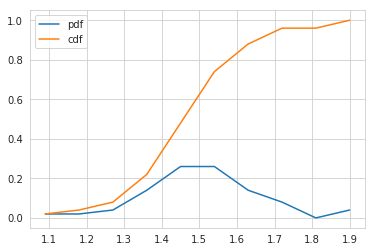

In [24]:
counts, bin_edges = np.histogram(setosa['petal length (cm)'], bins=10, density=True)
print(counts)
print(bin_edges)

pdf = counts / sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.legend()
plt.show()

At any point the CDF, the y value imples that y percent of Setosa lies under x value of length.

## Mean Variance and Standard deviation

Mean of a feature can be considered as the *central tendancy* for a range of values.

Whereas, Standard deviation is the *spread* of the values in that feature. In addition, the values are spread around the mean. 

Variance can be defined as the average square distance of a point in a range from its mean.

$
var = 1/n *(x_i - \mu)^2 
$

In [32]:
mean_setosa = np.mean(setosa)
std_setosa = np.std(setosa)
print('Mean values \n', mean_setosa)
print('\nStd values\n', std_setosa)

Mean values 
 sepal length (cm)    5.006
sepal width (cm)     3.428
petal length (cm)    1.462
petal width (cm)     0.246
dtype: float64

Std values
 sepal length (cm)    0.348947
sepal width (cm)     0.375255
petal length (cm)    0.171919
petal width (cm)     0.104326
dtype: float64


## Median